<h1><center>Together in Space: Modeling Orbits With Python!</center></h1>
Have you ever looked at a blank graph and said to yourself *I wish I could model some orbits on this!?* Well look no further! With this python program, you will be able to choose your own initial condtions, mass, position, and velocity of both bodies, and model the resulting orbital patterns!

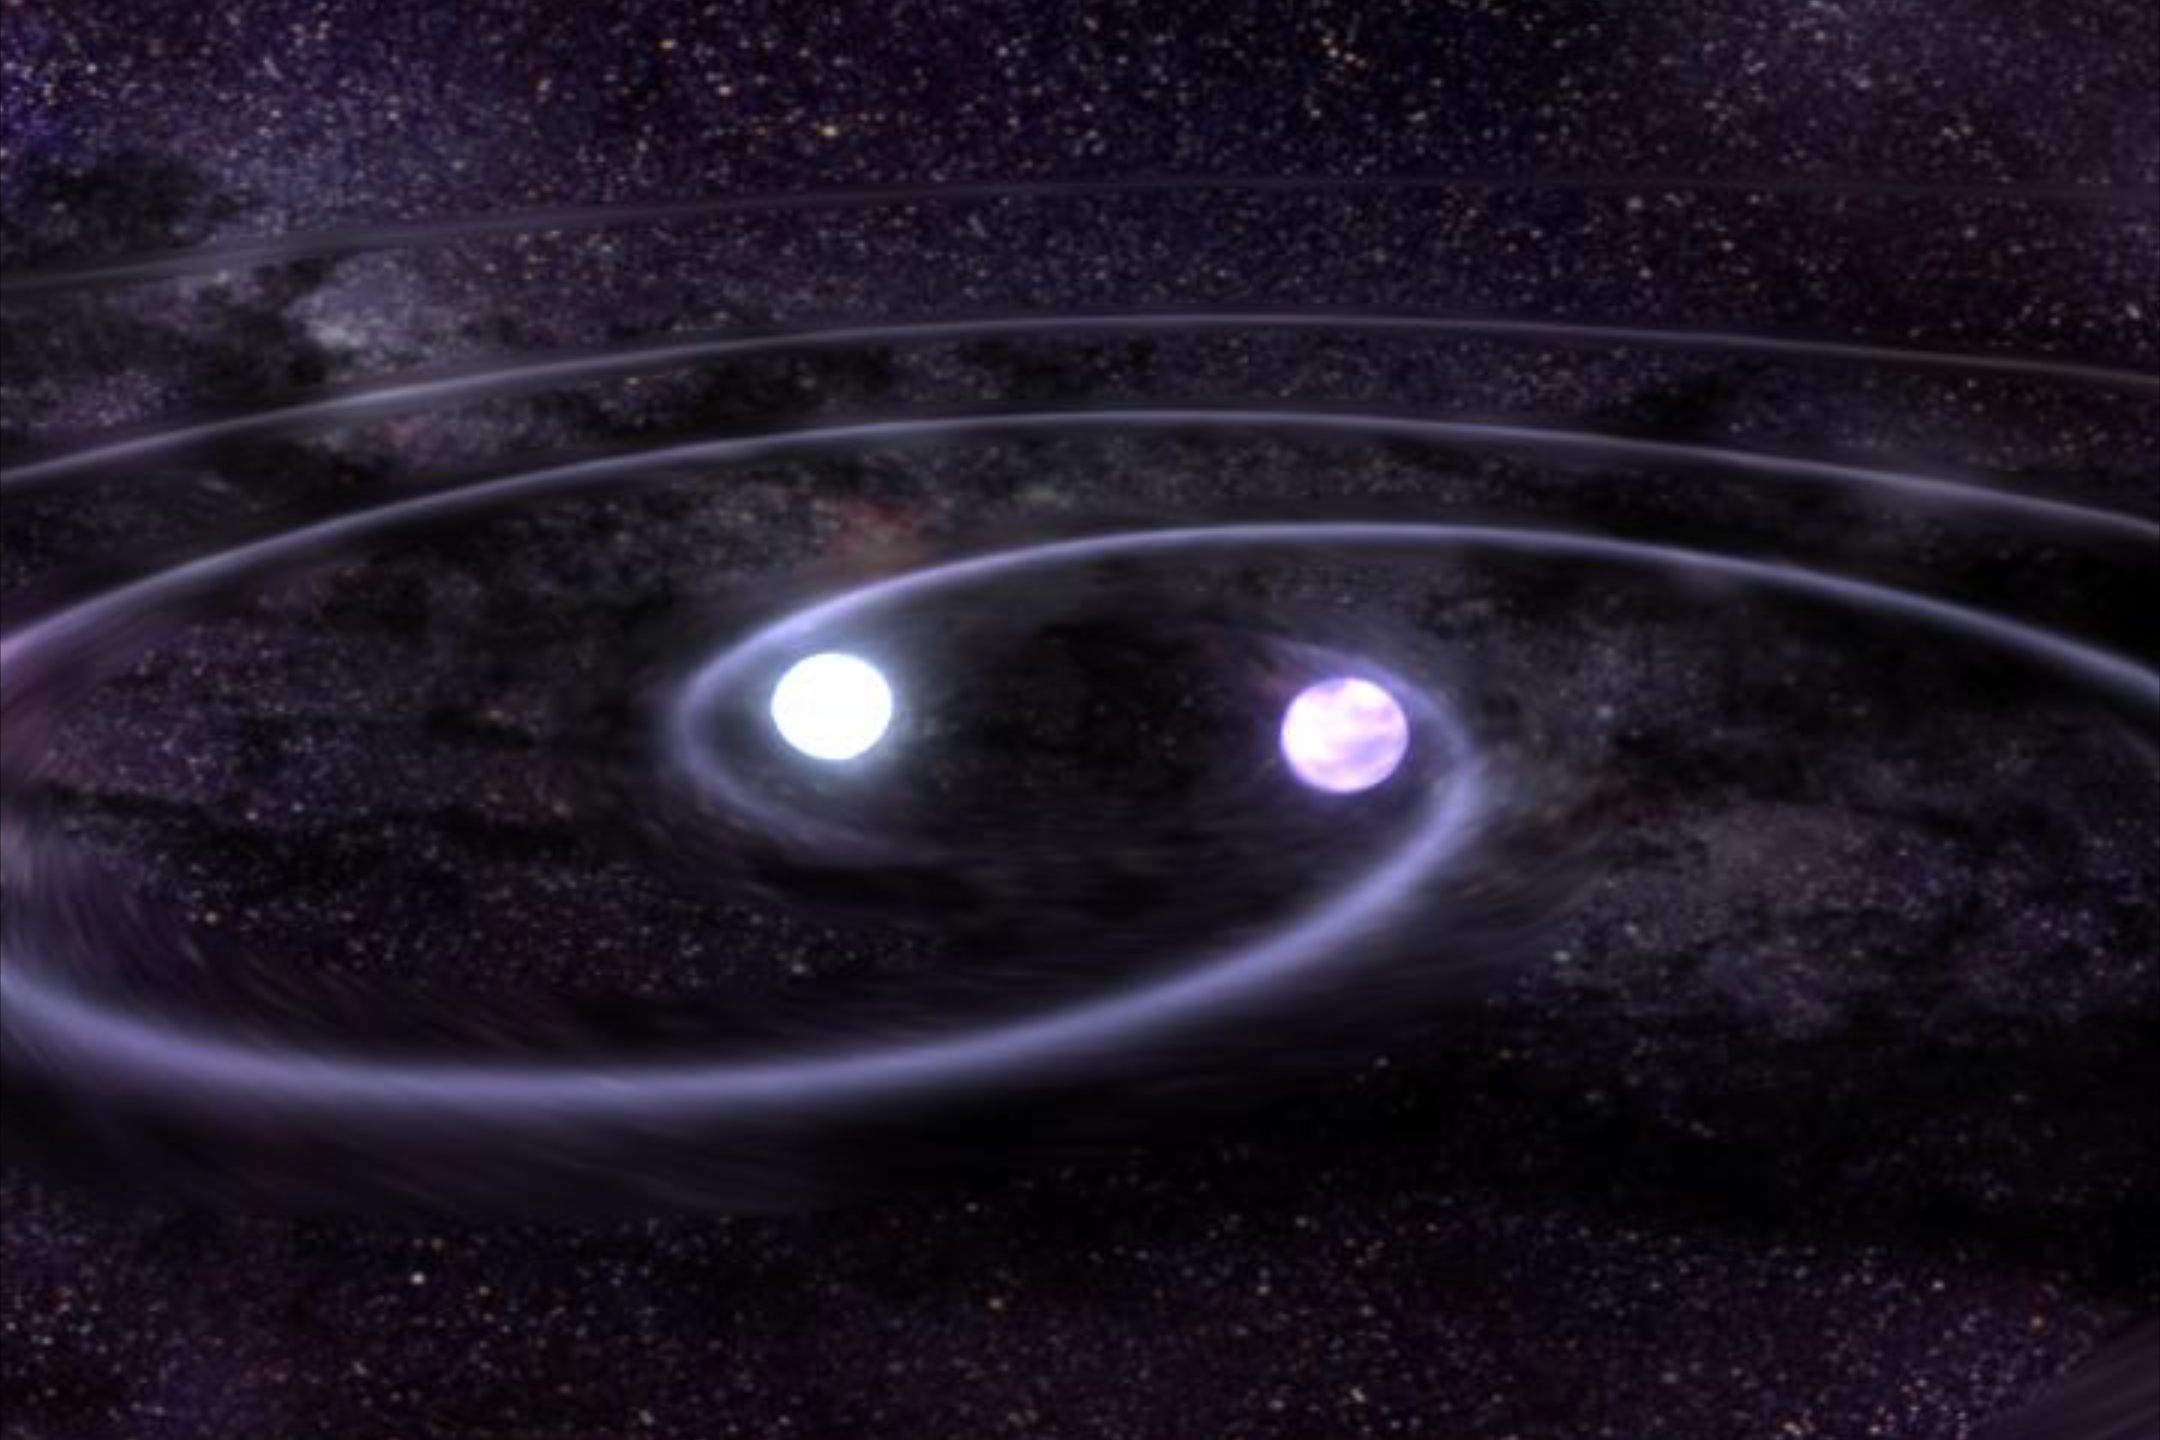

In [11]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import vpython as vp
from vpython import *

For the first cell of this notebook, we will start by importing all of the needed python packages. For this project in particular, math and numerical python are needed to access pi, and the array function respectively. Next, we will also import matplitlib.pyplot to gain access the plotting ability in order to create the various interesting graphs you will see later in the project. Finally we will import vpython, in order to create the complex animations.

In [12]:
# r = np.array([Ax, Ay, Avx, Avy, Bx, By, Bvx, Bvy])
def f(r):
    #G = 6.67e-11
    G = 4 * m.pi**2
    #Galaxtic masses
    mA = 1
    mB = 1
    #distance components
    Adeltx = r[4] - r[0]
    Adelty = r[5] - r[1]
    Bdeltx = r[0] - r[4]
    Bdelty = r[1] - r[5]
    #force components
    AFx = Adeltx * G * mA * mB / ((Adeltx**2 + Adelty**2))
    AFy = Adelty * G * mA * mB / ((Adeltx**2 + Adelty**2))
    BFx = Bdeltx * G * mB * mA / ((Bdeltx**2 + Bdelty**2))
    BFy = Bdelty * G * mB * mA / ((Bdeltx**2 + Bdelty**2))
    #acceleration components
    Aax = AFx / mA
    Aay = AFy / mA
    Bax = BFx / mB
    Bay = BFy / mB
    
    Avx = r[2]
    Avy = r[3]
    Bvx = r[6]
    Bvy = r[7]

    return np.array([Avx, Avy, Aax, Aay, Bvx, Bvy, Bax, Bay], float)



The code in the aboce cell represents the function f. This function takes the array (r) that contains the position and velocity componants of each orbiting body respectively. Useing the positional data, f calculates the distance componants from each body to the other, and useses this information along with the masses of both bodies to calculate the gravitational force vector componants for each body. 
$$F = (Gmm)/(r^2)*r hat$$

Finaly, f then uses these componants, and the masses of the respective bodies to calculate the acceleration vector componants for each body. With this new data, f then returns an array containing the velocity componants from the (r) array and the new acceleration componants of each orbiting body respectively.

In [13]:
def RK4():
    #v = +-4.45 (if mA = mB) (smooth)
   #r = np.array([A X-pos, A Y-pos, Ax-vel, A Y-vel, B X-pos, B Y-pos, B x-vel, B Y-vel])
    r = np.array([0, 1, 4.45, 0, 0, -1, -4.45, 0], float)
    a = 0
    b = 3
    N = 10000
    h = (b - a) / N
    Ax = []
    Ay = []
    Bx = []
    By = []
    times = np.arange(a, b, h)
    for t in times:
        k1 = h * f(r)
        k2 = h * f(r + .5 * k1)
        k3 = h * f(r + .5 * k2)
        k4 = h * f(r + k3)
        r += (k1 + 2 * k2 + 2 * k3 + k4)/6
        Ax.append(r[0])
        Ay.append(r[1])
        Bx.append(r[4])
        By.append(r[5])
    plt.plot(Ax, Ay)
    plt.plot(Bx, By, 'r')
    plt.show()

While it is hard to pin down the "most imporant" part of this code simply because it is all required to work successfully, the above cell contains the Fourth-Order Runge-Kutta method (RK4 for short), that is surely responsible for the bulk of this program's work and computation. The RK4 function starts out by defining an array containing the initial conditions of the position and velocity componants of both bodies. The variables (a) and (b) are then used to define the starting and ending points of the RK4 function. For our calculations to be accurate and smooth, a high N value is used, so then when calculating h, we get a very small number. Next, four empty lists are created to store the position componants of both orbiting bodies. Next, the Fourth-Order Runge-Kutta algorithm is run, which ultimatly calculates and updates the array (r) to display the derivative of the function. After the (r) array is modified, the initial empty lists are appended with the respective (r) index that represents position now. Lastly, the two lists for each body are then plotted on the same graph to show the movement and behavior of the bodies' graviational effect on eachother. 

This program uses astronomical units rather than SI units, to avoid very large numbers and their resulting confusion. If we want to see a near perfect orbit, we can use the preset numbers and see a graph that looks like this:

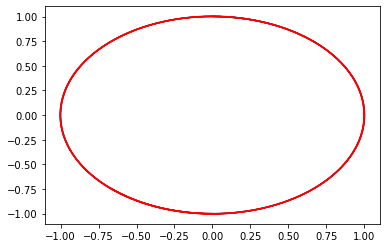

In [14]:
def main():
    return RK4()


main()

It is hard to see here because the red line is on top of the blue line, but these bodies are orbiting eachother nearly perfectly. Try changing elements in the (r) array and see what happens! You can also make b larger in RK4 to graph more points!

Image Sources:

Chandra X-Ray Observatory, https://chandra.harvard.edu/resources/illustrations/neutronstars.html
